In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('titanic_train.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import seaborn as sns

/home/prateek/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

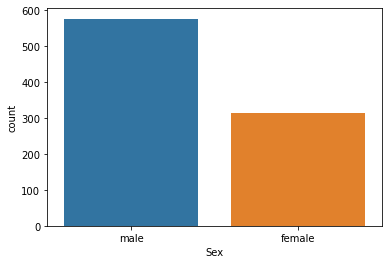

In [6]:
gender = dataset['Sex']
sns.countplot(gender)

/home/prateek/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

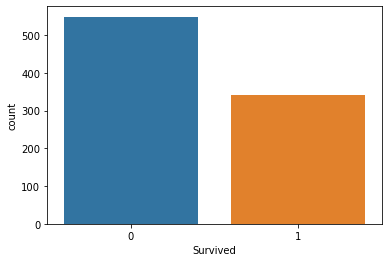

In [7]:
survived = dataset['Survived']
sns.countplot(survived)

/home/prateek/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

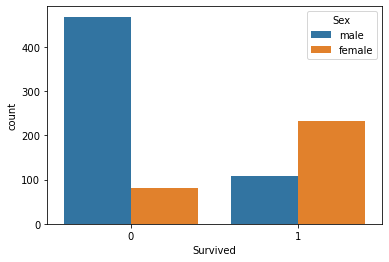

In [8]:
sns.countplot(survived, hue = 'Sex', data=dataset)

/home/prateek/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

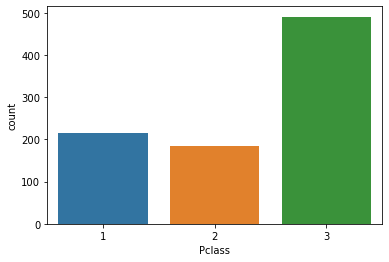

In [9]:
pclass = dataset['Pclass']
sns.countplot(pclass)

/home/prateek/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

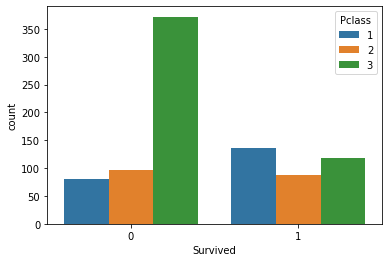

In [10]:
sns.countplot(survived, hue = 'Pclass', data = dataset)

In [11]:
y = dataset['Survived']

In [12]:
X = dataset[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Cabin' , 'Embarked']]

In [13]:
sex = X['Sex']
# Converting into dummy variable
sex = pd.get_dummies(sex, drop_first=True)

In [14]:
pclass = X['Pclass']
pclass = pd.get_dummies(pclass, drop_first=True)

In [15]:
sibsp = X['SibSp']
sibsp = pd.get_dummies(sibsp, drop_first=True)

In [16]:
# finds the null values
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

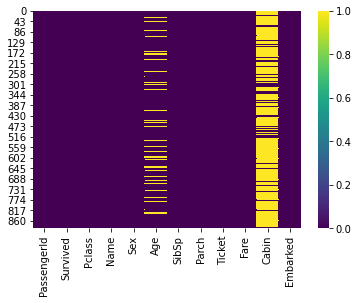

In [17]:
# Visualize where value is True
# cmap for color
sns.heatmap(dataset.isnull(), cmap = 'viridis')

In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
# removing the column 'Cabin'
#inplace will update the X automatically
X.drop('Cabin', axis = 1, inplace = True)

/usr/lib64/python3.9/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [21]:
age = dataset['Age']

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

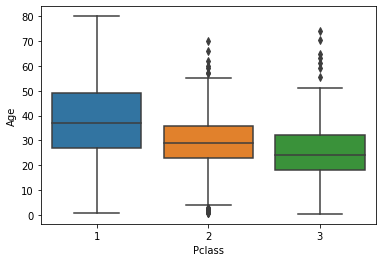

In [22]:
sns.boxplot(y = 'Age', x = 'Pclass', data = dataset)

In [23]:
# missing value: fill out : value: DATA IMPUTATION
def age_filler(cols):
    Pclass = cols[1]
    age = cols[0]
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return age
    

In [24]:
age = dataset[['Age', 'Pclass']].apply(age_filler, axis = 1)

In [25]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [26]:
X['Age'] = age

<ipython-input-26-6680421d03ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = age


In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,25.0,1,2,S
889,1,male,26.0,0,0,C


<AxesSubplot:>

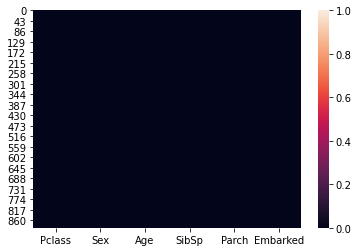

In [28]:
sns.heatmap(X.isnull())

In [29]:
# Drops null rows
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [31]:
dataset_final = pd.concat([age, pclass, sibsp, sex, y], axis = 1)

In [32]:
#drops null rows
dataset_final = dataset_final.dropna()

In [33]:
y = dataset_final['Survived']

In [34]:
#removing 'Survived'
X = dataset_final.iloc[:, :-1]

In [35]:
y.shape, X.shape

((891,), (891, 10))

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape

(712, 10)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

/usr/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
X_test.shape

(179, 10)

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [45]:
# finding the errors
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, y_pred)

array([[93, 12],
       [21, 53]])

In [47]:
#here 93 and 53 means right answer
# 12 and 21 is wrong answer. 

In [48]:
total_test = 93+12+21+53

In [49]:
right = 93+53

In [50]:
accuracy_score = right/total_test *100


In [51]:
accuracy_score

81.56424581005587